# Deep Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

## Import and Preprocess Data

In [3]:
data = pd.read_csv("data_new.csv")

In [4]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,is_duplicate
0,0,0.974823,0.007445,0.909091,0.909091,0.888889,14,12,2,7,...,0,False,False,0,0,0,1,1,0,0
1,1,0.890409,0.842271,0.615385,0.545455,0.444444,8,13,-5,5,...,0,False,False,0,0,0,1,1,0,0
2,2,0.941350,0.000028,0.600000,0.000000,0.000000,14,10,4,5,...,0,False,False,0,0,0,1,1,0,0
3,3,0.537349,0.002280,0.000000,0.000000,0.000000,11,9,2,3,...,3,False,True,0,8,-8,2,1,1,0
4,4,0.883384,0.899935,0.333333,0.000000,0.000000,13,7,6,8,...,0,False,False,0,0,0,1,1,0,0


In [5]:
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', 'is_duplicate'],
      dtype='object')

In [6]:
#Drop first column
data.drop(data.columns[0], axis=1, inplace=True)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,is_duplicate
0,0.974823,0.007445,0.909091,0.909091,0.888889,14,12,2,7,6,...,0,False,False,0,0,0,1,1,0,0
1,0.890409,0.842271,0.615385,0.545455,0.444444,8,13,-5,5,8,...,0,False,False,0,0,0,1,1,0,0
2,0.941350,0.000028,0.600000,0.000000,0.000000,14,10,4,5,5,...,0,False,False,0,0,0,1,1,0,0
3,0.537349,0.002280,0.000000,0.000000,0.000000,11,9,2,3,4,...,3,False,True,0,8,-8,2,1,1,0
4,0.883384,0.899935,0.333333,0.000000,0.000000,13,7,6,8,4,...,0,False,False,0,0,0,1,1,0,0


In [8]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,is_duplicate
404205,0.946792,8.336925e-07,0.833333,0.6,0.5,14,13,1,6,6,...,-2,False,False,0,0,0,1,1,0,0
404206,0.933375,7.051148e-01,0.666667,0.5,0.0,8,9,-1,3,3,...,0,False,False,0,0,0,1,1,0,1
404207,1.000000,0.000000e+00,1.000000,0.0,0.0,4,3,1,1,1,...,0,False,False,0,0,0,1,1,0,0
404208,0.695186,1.034561e+00,0.000000,0.0,0.0,17,25,-8,9,13,...,0,False,False,0,0,0,1,1,0,0
404209,1.000000,0.000000e+00,1.000000,1.0,1.0,8,10,-2,3,3,...,0,False,False,0,0,0,1,1,0,0


In [9]:
#Check for null values
data.isnull().any()

0                True
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
is_duplicate    False
dtype: bool

In [10]:
data[data.isnull().values==True]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,is_duplicate
373,NaN,0.753031,0.400000,0.000000,0.0,7,9,-2,2,3,...,-1,False,False,0,0,0,1,1,0,1
395,NaN,0.494966,0.666667,0.000000,0.0,3,5,-2,2,1,...,0,False,False,0,0,0,1,1,0,1
472,NaN,0.051778,0.444444,0.000000,0.0,5,20,-15,2,8,...,-3,False,False,0,3,-3,1,1,0,0
693,NaN,0.014831,0.000000,0.000000,0.0,8,16,-8,3,4,...,-1,False,False,0,0,0,1,2,-1,0
848,NaN,0.494943,0.666667,0.000000,0.0,6,6,0,1,2,...,0,False,False,0,0,0,1,1,0,1
910,NaN,0.494966,0.666667,0.000000,0.0,7,5,2,2,1,...,0,False,False,0,0,0,1,1,0,0
977,NaN,0.872719,0.200000,0.000000,0.0,9,27,-18,3,8,...,0,False,False,0,0,0,1,1,0,0
993,NaN,0.450732,0.800000,0.666667,0.0,6,6,0,2,3,...,0,False,False,0,0,0,1,1,0,0
1052,NaN,0.758368,0.333333,0.000000,0.0,12,6,6,5,2,...,0,False,False,0,0,0,1,1,0,0
1456,NaN,0.765321,0.571429,0.400000,0.0,5,10,-5,3,4,...,-1,False,False,0,0,0,1,1,0,1


In [11]:
#Delete null values
data['0'] = data['0'].fillna('null') 
data = data[~data['0'].isin(['null'])] 

In [12]:
data[data.isnull().values==True]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,is_duplicate


In [13]:
len(data)

399003

In [14]:
#Transform bool into int
data[['23', '24']] = data[['23', '24']] *1

In [15]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,is_duplicate
0,0.974823,0.007445,0.909091,0.909091,0.888889,14,12,2,7,6,...,0,0,0,0,0,0,1,1,0,0
1,0.890409,0.842271,0.615385,0.545455,0.444444,8,13,-5,5,8,...,0,0,0,0,0,0,1,1,0,0
2,0.94135,0.000028,0.600000,0.000000,0.000000,14,10,4,5,5,...,0,0,0,0,0,0,1,1,0,0
3,0.537349,0.002280,0.000000,0.000000,0.000000,11,9,2,3,4,...,3,0,1,0,8,-8,2,1,1,0
4,0.883384,0.899935,0.333333,0.000000,0.000000,13,7,6,8,4,...,0,0,0,0,0,0,1,1,0,0


In [16]:
#Scale variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_data = data.copy()
cols = [i for i in data.columns if i not in ["is_duplicate"]]
scale_data[cols] =  scaler.fit_transform(scale_data[cols])

In [17]:
scale_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,is_duplicate
0,0.961161,0.006743,0.909091,0.909091,0.888889,0.104839,0.046610,0.700935,0.142857,0.060976,...,0.629630,0.0,0.0,0.0,0.0,0.450704,0.166667,0.111111,0.615385,0
1,0.830942,0.762871,0.615385,0.545455,0.444444,0.056452,0.050847,0.679128,0.095238,0.085366,...,0.629630,0.0,0.0,0.0,0.0,0.450704,0.166667,0.111111,0.615385,0
2,0.909524,0.000025,0.600000,0.000000,0.000000,0.104839,0.038136,0.707165,0.095238,0.048780,...,0.629630,0.0,0.0,0.0,0.0,0.450704,0.166667,0.111111,0.615385,0
3,0.286301,0.002065,0.000000,0.000000,0.000000,0.080645,0.033898,0.700935,0.047619,0.036585,...,0.666667,0.0,1.0,0.0,0.2,0.338028,0.333333,0.111111,0.692308,0
4,0.820105,0.815099,0.333333,0.000000,0.000000,0.096774,0.025424,0.713396,0.166667,0.036585,...,0.629630,0.0,0.0,0.0,0.0,0.450704,0.166667,0.111111,0.615385,0


In [18]:
len(scale_data)

399003

## Build Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
from keras.optimizers import sgd

Using TensorFlow backend.


In [20]:
train, test = train_test_split(scale_data, train_size=0.8, random_state=790)

In [21]:
train_x = train.drop(['is_duplicate'], axis=1)
train_y = train['is_duplicate']

In [22]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
46331,0.783882,0.017698,0.500000,0.333333,0.0,0.064516,0.033898,0.694704,0.095238,0.024390,...,0.018182,0.629630,0.0,0.0,0.0,0.1,0.394366,0.166667,0.111111,0.615385
65652,1.000000,0.410511,0.800000,0.666667,0.0,0.056452,0.033898,0.691589,0.023810,0.024390,...,0.036364,0.629630,0.0,0.0,0.0,0.0,0.450704,0.166667,0.111111,0.615385
14422,1.000000,0.000000,1.000000,1.000000,1.0,0.056452,0.016949,0.704050,0.047619,0.024390,...,0.018182,0.629630,0.0,0.0,0.0,0.0,0.450704,0.166667,0.111111,0.615385
135980,0.744759,0.791914,0.222222,0.000000,0.0,0.080645,0.029661,0.704050,0.095238,0.048780,...,0.018182,0.629630,0.0,0.0,0.0,0.0,0.450704,0.166667,0.111111,0.615385
762,0.461903,0.840549,0.000000,0.000000,0.0,0.024194,0.067797,0.654206,0.071429,0.060976,...,0.309091,0.432099,0.0,0.0,0.0,0.0,0.450704,0.166667,0.111111,0.615385


In [23]:
test_x = test.drop(['is_duplicate'], axis=1)
test_y = test['is_duplicate']

In [24]:
train_y = to_categorical(train_y, 2)
test_y = to_categorical(test_y, 2)

In [25]:
model = Sequential([
    Dense(512, input_dim=31, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
model.fit(train_x, train_y, epochs=60)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/60
319202/319202 [==============================] - 93s 291us/step - loss: 0.5579 - binary_accuracy: 0.6674
Epoch 2/60
319202/319202 [==============================] - 92s 288us/step - loss: 0.5448 - binary_accuracy: 0.6769
Epoch 3/60
319202/319202 [==============================] - 89s 278us/step - loss: 0.5412 - binary_accuracy: 0.6829
Epoch 4/60
319202/319202 [==============================] - 97s 305us/step - loss: 0.5389 - binary_accuracy: 0.6860
Epoch 5/60
319202/319202 [==============================] - 82s 256us/step - loss: 0.5370 - binary_accuracy: 0.6886
Epoch 6/60
319202/319202 [==============================] - 78s 245us/step - loss: 0.5352 - binary_accuracy: 0.6902
Epoch 7/60
319202/319202 [==============================] - 80s 252us/step - loss: 0.5334 - binary_accuracy: 0.6911
Epoch 8/60
319202/319202 [==============================] - 80s 249us/step - loss: 0.5320 -

In [39]:
model.evaluate(test_x, test_y)

79801/79801 [==============================] - 5s 57us/step


[0.5687834473990601, 0.6553176025437782]

## Evaluation

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(fpr1,tpr1, fpr2, tpr2): 
    """
    Plot ROC Curve
    :fpr: false positive rate
    :tpr: true positive rate
    :return: positive rate
    """
    plt.plot(fpr1,tpr1) 
    plt.plot(fpr2,tpr2) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.title('ROC curve for DNN')
    #plt.savefig("DNN_ROC", dpi=300)
    plt.show()  

In [41]:
train_y_predict = model.predict_proba(train_x)
test_y_predict = model.predict_proba(test_x)

### ROC Curve

In [42]:
fpr_train, tpr_train, thresholds = roc_curve (train_y[:,1], train_y_predict[:,1])
fpr_test , tpr_test , thresholds = roc_curve (test_y[:,1], test_y_predict[:,1])

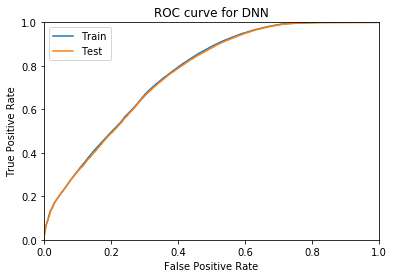

In [43]:
plot_roc_curve (fpr_train, tpr_train, fpr_test, tpr_test) 

### AUC

In [44]:
auc_train=roc_auc_score(train_y[:,1], train_y_predict[:,1])
auc_test=roc_auc_score(test_y[:,1], test_y_predict[:,1])

In [45]:
auc_train

0.765909399106529

In [46]:
auc_test

0.7625580162040391

### Log-loss

In [47]:
log_loss(train_y[:,1], train_y_predict[:,1])

0.5665819795856298

In [48]:
log_loss(test_y[:,1], test_y_predict[:,1])

0.56878344812697

### Accuracy

In [49]:
pred = (train_y_predict[:,1] > 0.5)*1
sum(train_y[:,1] == pred) / len(pred)

0.659009028765484

In [50]:
pred = (test_y_predict[:,1] > 0.5)*1
sum(test_y[:,1] == pred) / len(pred)

0.6553176025363091